# Análisis experimental de algoritmo

Análisis experimental del algoritmo selection sort para procecar número de datos N

In [1]:
import random
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Empezamos por considerar función que ordena un array dado

In [2]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]


Ahora dfinimos una función que genera distintos arreglos de tamaño n


In [3]:
def generate_random_array(n):
    return [random.randint(1, 1000) for _ in range(n)]

Generamos una lista de la siguiente manera: el primer elemento es una lista de 10 elementos, la segunda de 15 y así sucesivamente hasta llegar a una lista de 1000 elementos, luego con ayuda de la propiedad lambda y la libreria timeit aplicamos el algoritmo de ordenamiento y lo guardamos en la lista junto con su tiempo de ejecución y finalmente lo guardamos en un dataframe de pandas para que pueda ser legible y exportado

In [4]:
#Generamos los tamaños de las listas
tamaños_arreglos = list(range(10, 1000, 5))
#Guardaremos el tamaño del arreglo y el tiempo de ejecución en la lista resultados
resultados = []

#Generamos las listas con ayuda de la función definida anteriormente
for tamaño in tamaños_arreglos:
    arreglo = generate_random_array(tamaño)
    #Aplicamos el algoritmo selection_sort y medimos el tiempo de ejecución
    tiempo_ejecucion = timeit.timeit(lambda: selection_sort(arreglo.copy()), number=1)
    #Agregamos el tamaño del arreglo y 
    resultados.append((tamaño, tiempo_ejecucion))
    
#Con ayuda de pandas guardamos los resultados en un data frame
df = pd.DataFrame(resultados, columns=['Tamaño de la lista', 'Tiempo de Ejecución (segundos)'])

Ahora realizamos una gráfica del tamaño de los arreglos vs el tiempo de ejecución en segundos


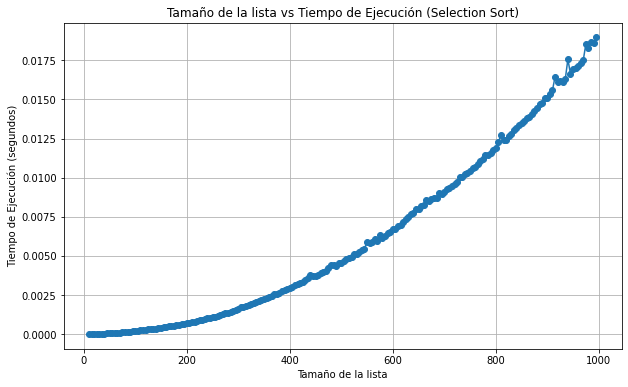

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Tamaño de la lista'], df['Tiempo de Ejecución (segundos)'], marker='o')
plt.title('Tamaño de la lista vs Tiempo de Ejecución (Selection Sort)')
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()

El Selection Sort es un algoritmo de ordenamiento que tiene una complejidad de tiempo de peor caso de $O(n^2)$ donde "n" es el número de elementos en el arreglo a ordenar. Esto significa que en el peor caso, el tiempo de ejecución crecerá cuadráticamente con el número de elementos. Por lo tanto, una cota superior adecuada para el Selection Sort sería una función cuadrática de la forma
$$ f(x)=kx^2 $$

donde $k$ es una constante que depende de factores externos como el hardware y la implementación del algoritmo, en este caso se utilizo la forma popular.

Empecemos por definir la función quadrática que servirá como cota, a "ojo de buen cubero" utilizaremos $k= \frac{1}{20010000}$

In [6]:
def quadratic_upper_bound(x):
    return (x ** 2) / 20010000 

Veamos cómo se ajusta a nuestros datos:

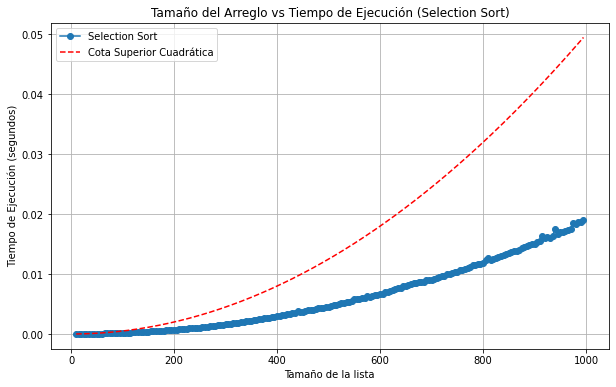

In [7]:
def quadratic_upper_bound(x):
    return (x ** 2) / 20010000 
plt.figure(figsize=(10, 6))
plt.plot(df['Tamaño de la lista'], df['Tiempo de Ejecución (segundos)'], marker='o', label='Selection Sort')
x = np.arange(10, 1000, 5)
plt.plot(x, [quadratic_upper_bound(t) for t in x], label='Cota Superior Cuadrática', linestyle='--', color='red')

plt.title('Tamaño del Arreglo vs Tiempo de Ejecución (Selection Sort)')
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.legend()
plt.grid(True)
plt.show()

Este valor de $k$ es una cota pero no la mejor así que buscaremos otra aproximación:

-Almacenaremos los pares de datos $(n,t)$ donde $n$ es el número de datos y $t$ es el tiempo de ejecución
-Utilizaremos el ajuste de mínimos cuadrados para poder acoplar una función cuadrática

Para esto ya tenemos el primer punto y afortunadamente numpy ya cuenta con funciones para realizar el ajuste:

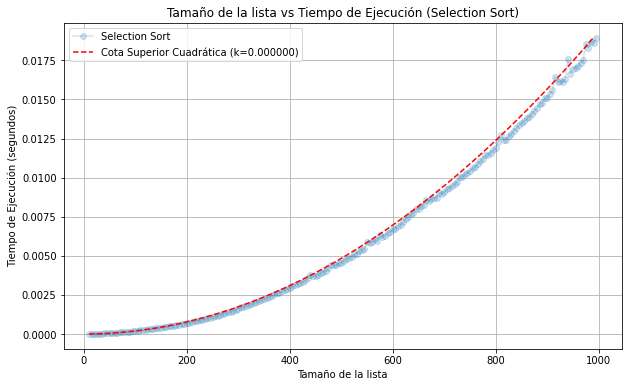

In [8]:
coeficientes = np.polyfit(df['Tamaño de la lista'], df['Tiempo de Ejecución (segundos)'], 2)

# El coeficiente coeficientes[0] es el coeficiente cuadrático (k en la cota superior)
k = coeficientes[0]

# Función cuadrática para la cota superior
def quadratic_upper_bound(x):
    return k * x**2

# Crear una gráfica
plt.figure(figsize=(10, 6))
plt.plot(df['Tamaño de la lista'], df['Tiempo de Ejecución (segundos)'], marker='o', label='Selection Sort', alpha=0.2)
x = np.arange(min(df['Tamaño de la lista']), max(df['Tamaño de la lista']), 5)
plt.plot(x, [quadratic_upper_bound(t) for t in x], label=f'Cota Superior Cuadrática (k={k:.6f})', linestyle='--', color='red')

plt.title('Tamaño de la lista vs Tiempo de Ejecución (Selection Sort)')
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.legend()
plt.grid(True)
plt.show()

Para este ejemplo tenemos el siguiente valor de $k$

In [9]:
print(k)

1.9353009834117443e-08


Calcular una cota inferior para el algoritmo de Selection Sort es un poco más complicado que encontrar una cota superior, ya que el Selection Sort siempre tiene una complejidad de tiempo de O(n^2) en el peor caso. Por lo tanto, cualquier cota inferior que definas debe ser al menos O(n^2).

Una cota inferior comúnmente utilizada para algoritmos de ordenación basados en comparaciones es la Cota Inferior de Ordenación por Comparaciones, que establece que ningún algoritmo de ordenación basado en comparaciones puede ser más eficiente que O(n*log(n)). Dado que el Selection Sort es O(n^2), está claro que no cumple esta cota inferior.

In [10]:
print(df)

     Tamaño de la lista  Tiempo de Ejecución (segundos)
0                    10                        0.000008
1                    15                        0.000010
2                    20                        0.000014
3                    25                        0.000019
4                    30                        0.000025
..                  ...                             ...
193                 975                        0.018569
194                 980                        0.018291
195                 985                        0.018695
196                 990                        0.018615
197                 995                        0.018962

[198 rows x 2 columns]


In [11]:
nombre_archivo = 'resultados.xlsx'
df.to_excel(nombre_archivo, index=False)

El código anterior exporta los resultados a una hoja excel